In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

## задача 1

сегодня на лекции мы познакомились с 3 мерами изменчивости: с размахом, дисперсией и интерквартильным расстоянием. попробуем использовать их!

логично, что чем меньше мера изменчивости, тем более постоянными должны быть наши значения. найдите самые постоянные по своей экспрессии гены в таблице с раком молочной железы

сперва прочитаем наш датасет и посмотрим на него:

In [ ]:
data = pd.read_csv('breast_cancer_1000_genes.tsv', sep = '\t', index_col = 0)

In [ ]:
data.shape

In [ ]:
data.head()

по вертикали тут отложены разные пробы, для которых была посчитана экспрессия, а по горизонтали (строчками!!) гены.
используя команды пандаса занесите в переменные minmax, var и iqr размах, дисперсию и интерквартильное расстояние соответственно

**помните, что по умолчанию пандас считает по столбцам, вам же надо по строкам. чтобы это не происходило, можно добавить к команде аргумент, указывающий на ось, вдоль которой считать: data.max(axis = 1)**

In [ ]:
minmax = #вам нужно вычесть из максимального значения по ряду минимальное

In [ ]:
var = #вам нужно применить к ряду функцию data.var() - она автоматически найдет дисперсию). но можно пофлексить и руками посчитать по формуле

In [ ]:
iqr = #тут надо вычесть из третьего квантиля первый. команда для нахождения третьего - data.quantile(0.75). для первого - data.quantile(0.25)
# не забывайте об axis = 1 !

здесь я за вас отбираю 10 генов с самыми маленькими из полученных значениями и делаю из них список

In [ ]:
minmax = minmax.sort_values().index[:10].to_list()
var = var.sort_values().index[:10].to_list()
iqr = iqr.sort_values().index[:10].to_list()

а тут делаю из них хитрую таблицу и рисую 3 графика! если графики прогнались - успех!

In [ ]:
sns.boxplot(data = data.loc[var].T.melt(), x = 'value', y = 'variable').set_title('Бокс-плот экспрессии 10 генов с минимальной дисперсией')

In [ ]:
sns.boxplot(data = data.loc[minmax].T.melt(), x = 'value', y = 'variable').set_title('Бокс-плот экспрессии 10 генов с минимальным размахом')

In [ ]:
sns.boxplot(data = data.loc[iqr].T.melt(), x = 'value', y = 'variable').set_title('Бокс-плот экспрессии 10 генов с минимальным интерквартильным расстоянием')

**Ваш анализ полученных бокс-плотов:**

Задача, которую мы сейчас с вами решили имеет большой практический смысл! Когда мы пытаемся измерять экспрессию генов с помощью ПЦР нам нужны контроли - гены, которые меньше всего меняют свою экспрессию от клетки к клетке. Вы знаете, что у всех клеток в организме разная функция, а значит, и разная экспрессия генов. Если мы ставим два ПЦРа каждый раз с разными клетками, сравнить экспрессию их генов мы не сможем, не зная, какие гены у них экспрессируются одинаково! Аналогично, мы не сможем посчитать абсолютную экспрессию гена клетки, попавшей в новые условия, если у нас не будет референсной точки - гена, который всегда экспрессируется одинаково, вне зависимости от условий.

Обычно роль таких референсных генов играют housekeeping genes -- гены домашнего хозяйства. Это гены, которые несут ключевую роль в жизнедеятельности клетки, если их убрать, клетка не выживет, если их экспрессию чуть-чуть поменять -- клетке будет ужасно плохо. Поэтому они всегда экспрессируются на одном и том же уровне. Примеры таких генов -- различные факторы транскрипции и трансляции, рибосомальные и митохондриальные белки. Логично, что меры изменчивости у них будут минимальными!

## задача 2

на лекции мы посмотрели на метод монте-карло -- с помощью него мы, постепенно добавляя в выборку все больше и больше значений, постепенно сглаживали гистограммы, пока не получим картинку, похожую на график плотности распределения. попробуем провернуть это в питоне!

сгенерируем случайные величины из нормального распределения (5 штук)

In [ ]:
sample = np.random.normal(size = 5)

и нарисуем гистограмму с 5 отрезками

In [ ]:
plt.hist(sample, bins = 5)
pass

ой! как-то непохоже на картинку нормального распределения... попробуйте подобрать параметры так, чтобы стало похоже!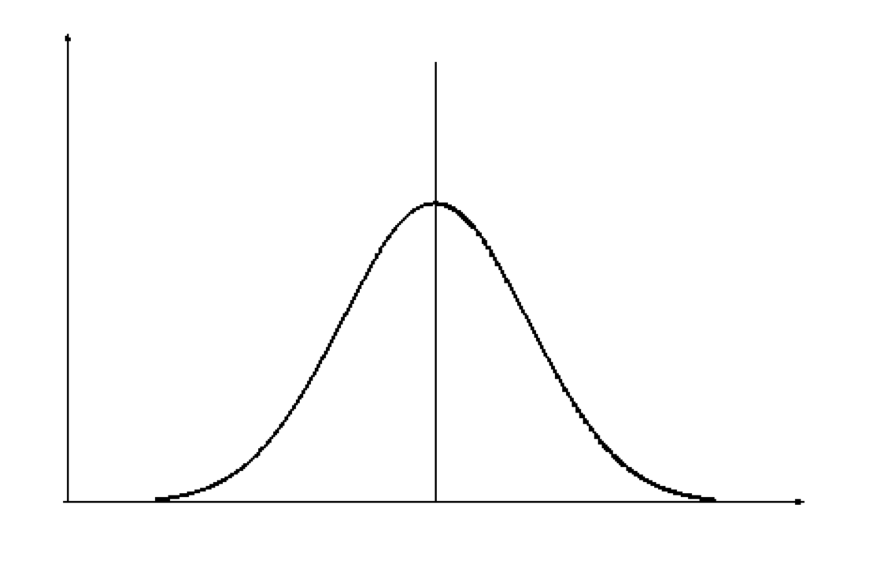

## задача 3



на самом деле, нормальное распределение -- вообще не единственное интересное распределение. на картинке снизу -- биномиальное распределение. у него есть 2 параметра -- сколько раз мы подбрасываем монетку (n) и с какой вероятностью монетка падает на решку (p). распределение показывает, сколько всего раз монетка выпала на решку за все наши броски
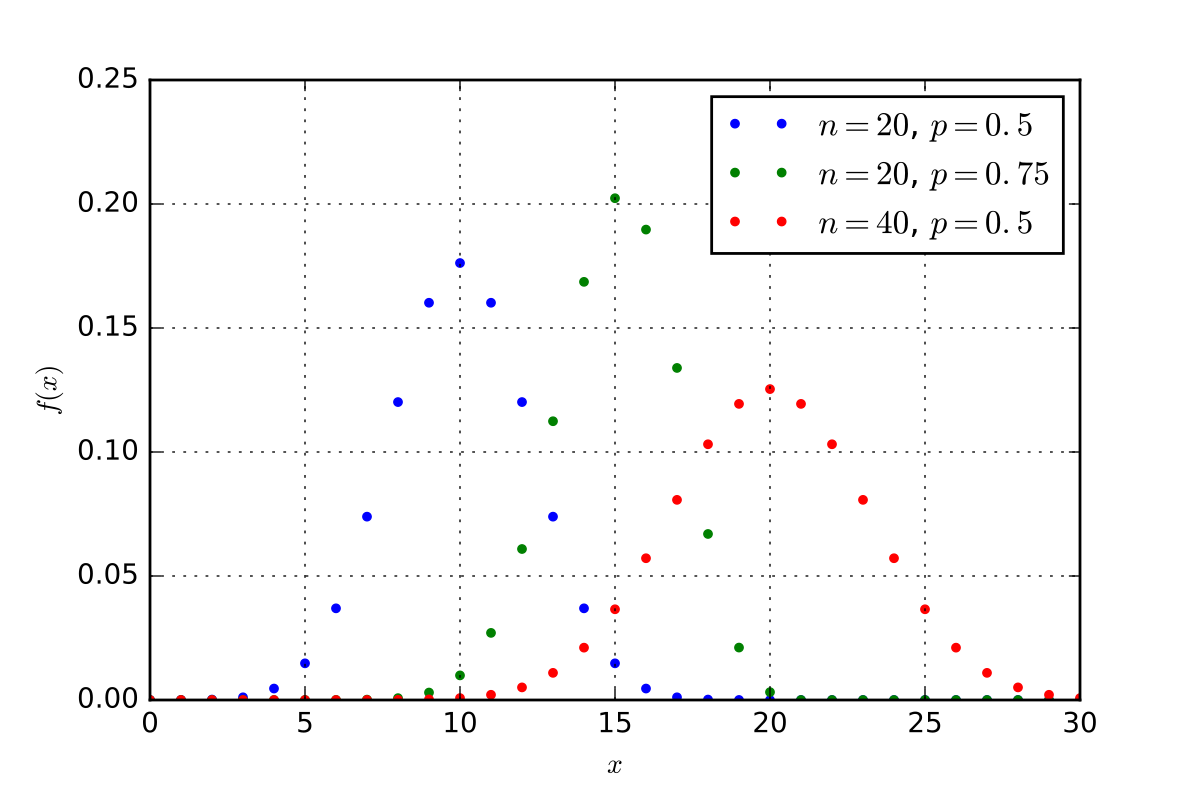

видно, что если монетка честная (вероятность решки = 0,5), за 20 бросков мы чаще всего выбросим 10 решек. если же монетка шулерская и решка выпадает в 3 из 4 случаях, чаще всего из 20 подброшенных монеток -- 15 решек (зеленый график)

биномиальное распределение, как и распределение бернулли, колоколообразное. это логично! мы с большей вероятностью выбросим примерно поровну орлов и решек, а вероятность выбросить только орлы или только решки стремится к нулю (если мы не гильденстерн и розенкранц)

давайте монетки бросать 😉

In [ ]:
from scipy.stats import bernoulli
# здесь мы задаем нашу монетку - как видно, она честная
coin = bernoulli(0.5)
# а тут подбрасываем сразу 20 монеток и записываем результаты подбрасывания в массив
twenty_coins = coin.rvs(20)
twenty_coins

In [ ]:
sum(twenty_coins)

пообщайтесь с соседями, у всех ли вас значения близки к 10? если что-то близкое к 0 или 20, считайте, что вы счастливчик и будете очень успешным в азартных играх

а теперь ваша задача -- написать цикл, в котором вы будете много-много раз подбрасывать 100 монеток и смотреть, сколько из них выпало на решку. количество решек записывайте в массив **bin**

*задавать монетку заново не нужно, но не забывайте каждый раз их подбрасывать)*


In [ ]:
bin = []
# ваш код

In [ ]:
plt.hist(bin, bins = 20)

посмотрите, получилось ли у вас что-то похожее на колокол? если нет, увеличьте количество циклов)

## задание 4

а теперь сделайте монетку нечестной и посмотрите, как сдвинулось вбок ваше распределение

In [ ]:
# ваш код

## задание 5

очень часто хочется примерно нарисовать форму распределения плотности нашего признака, но значений мало и получается только гистограмма...
нагенерить новые значения мы не можем, поэтому был придуман хак -- мы берем гистограмму и просто сглаживаем ее уголки) делается это с помощью особой функции, которая называется ядром. формула у нее страшная и сложная, но те, кому будет интересно, могут поискать это по запросу "ядерная оценка плотности"

попробуем сгладить уголки гистограммы признака age из титаника

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv', sep = ';')
sns.histplot(data = data, x = 'Age')

In [ ]:
sns.kdeplot(data=data, x='Age')

похоже, правда?

# домашнее задание

выберите любой датасет из предложенных:

* **[покемоны](https://www.kaggle.com/abcsds/pokemon?select=Pokemon.csv)**
https://raw.githubusercontent.com/gu1ldenstern/bioinf1514/master/%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/sem6_data_visualization/datasets/Pokemon.csv
* **[пересадки печени в индии](https://www.kaggle.com/uciml/indian-liver-patient-records)**
https://raw.githubusercontent.com/gu1ldenstern/bioinf1514/master/%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/sem6_data_visualization/datasets/indian_liver_patient.csv
* **[топ 50 треков на спотифае за 2020](https://www.kaggle.com/atillacolak/top-50-spotify-tracks-2020)**
https://raw.githubusercontent.com/gu1ldenstern/bioinf1514/master/%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/sem6_data_visualization/datasets/spotifytoptracks.csv


**1. проанализируйте датасеты и скажите, какие типы переменных перед вами?**
иногда бывает сложно сказать это однозначно, не бойтесь, ошибки не караются, да и чаще всего правильного однозначного ответа нет)

**2. выберите количественный признак и нарисуйте для него сиборновский боксплот. скажите, какое среднее значение признака? в каких диапазонах находится 75% всех наблюдений? какой минимум и максимум? видите ли вы выбросы на графике?**

**3. для этого же признака нарисуйте гистограмму. попробуйте сгладить ее)**

**4. доделайте классную работу)**


## ⚡⚡⚡ бонус ⚡⚡⚡
дается тому, кто сможет изолировать выбросы из своего признака (вывести строчки с ними на экран). естественно, шулерство с "нет выбросов" не считается))

In [ ]:
# ваш код